<a href="https://colab.research.google.com/github/melataguia/regretion_cluster../blob/main/random_forest_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation des bibliothèques nécessaires si elles ne sont pas déjà installées

# Charger les bibliothèques nécessaires

In [1]:
getwd()
if (!require(randomForest)) {
  install.packages("randomForest")
}

if (!require(caret)) {
  install.packages("caret")
}
if (!require(doParallel)) {
  install.packages("doParallel")
}
if (!require(files)) {
  install.packages("files")
}




[1] "/content"

Loading required package: randomForest

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘randomForest’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: caret

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘caret’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: doParallel

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there 

In [2]:
# Install and load the tensorflow package
if (!require(tensorflow)) {
  install.packages("tensorflow")
}
library(tensorflow)

# Check for GPU devices
cat("GPU devices:")
print(tf$config$experimental$list_physical_devices("GPU"))


Loading required package: tensorflow

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tensorflow’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘reticulate’, ‘tfruns’, ‘tfautograph’




GPU devices:list()


In [2]:
library(dplyr)
library(randomForest)
library(caret)
library(ggplot2)
library(doParallel)
library(tensorflow)



Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: ggplot2


Attaching package: ‘ggplot2’


The following object is masked from ‘package:randomForest’:

    margin


Loading required package: lattice

Loading required package: foreach

Loading required package: iterators

Loading required package: parallel



ERROR: Error in library(tensorflow): there is no package called ‘tensorflow’


# Charger la fonction combine de randomForest


In [3]:
combine <- randomForest::combine

###  Lire le fichier CSV

In [16]:
#movies <- read.csv('./movies.csv')
ratings <- read.csv('../ratings.csv')
#tags <- read.csv('./tags.csv')


In [5]:
ratings$rating <- as.numeric(as.character(ratings$rating))

In [17]:
str(ratings)

'data.frame':	158589 obs. of  4 variables:
 $ userId   : int  1 1 1 1 1 1 1 1 1 1 ...
 $ movieId  : num  1 3 6 47 50 70 101 110 151 157 ...
 $ rating   : num  4 4 4 5 5 3 5 4 5 5 ...
 $ timestamp: int  964982703 964981247 964982224 964983815 964982931 964982400 964980868 964982176 964984041 964984100 ...


In [18]:
length(ratings)

[1] 4

### Vérifier les données manquantes

In [19]:
missing_values <- sapply(ratings, function(x) sum(is.na(x)))
print(missing_values)

   userId   movieId    rating timestamp 
        0         0         0         2 


# Supprimer les lignes avec des valeurs manquantes si nécessaire

In [20]:
ratings <- ratings[complete.cases(ratings), ]


# Autres traitement sur les donnees
# Gérer les valeurs aberrantes si nécessaire
# ...

# Créer des caractéristiques supplémentaires si nécessaire
# ...


### Diviser les données en ensembles d'apprentissage et de test

In [21]:
set.seed(123)  # Pour la reproductibilité

### Définir la proportion d'observations pour l'ensemble de test (par exemple, 30%)


In [11]:
#p <- 0.09

### Sélectionner les indices aléatoires pour l'ensemble de test


In [22]:
index <- createDataPartition(ratings$rating, p = 0.007, list = FALSE)

In [23]:
length(index)

[1] 1112

# # Créer les ensembles d'entraînement et de test

In [24]:
train_index <- sample(index, 0.7 * length(index))
train_data <- ratings[-train_index, ]


In [25]:
length(train_index)

[1] 778


### Sélectionner 10% des données pour l'ensemble de test


In [26]:
test_index <- setdiff(index, train_index)
test_data <- ratings[test_index, ]

In [27]:
length(test_index)

[1] 334

### Configuration de la parallélisation


In [28]:
cl <- makeCluster(detectCores())
registerDoParallel(cl)

## Création du modèle Random Forest avec parrallelisation


In [29]:
rf_model <- randomForest(rating ~ ., data = train_data, ntree = 5, ncores = getDoParWorkers())

### Arrêter le cluster parallèle


In [30]:
stopCluster(cl)

# Faire des prédictions sur l'ensemble de test


In [31]:
predictions <- predict(rf_model, newdata = test_data)



# Évaluer les performances du modèle (par exemple, RMSE)


In [32]:
rmse <- sqrt(mean((predictions - test_data$rating)^2))
print(paste("RMSE:", rmse))

[1] "RMSE: 0.603716008039255"


####Affiche les valeurs prédites par votre modèle par rapport aux valeurs réelles. Cela peut vous donner une idée visuelle de la précision du modèle.

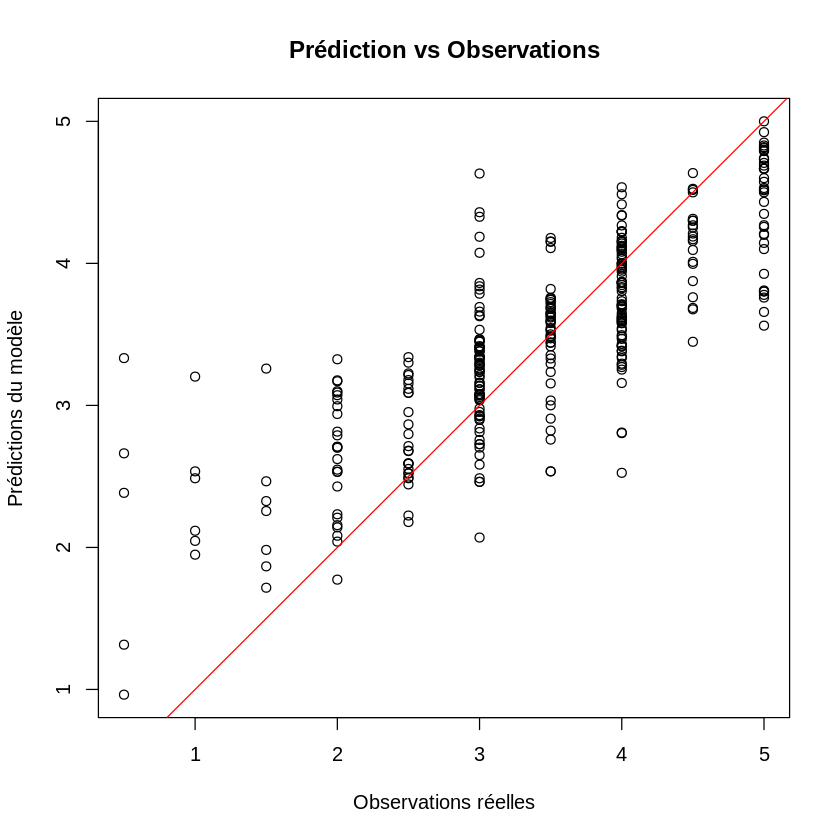

In [33]:
plot(test_data$rating, predictions, main = "Prédiction vs Observations",
     xlab = "Observations réelles", ylab = "Prédictions du modèle")
abline(0, 1, col = "red")  # Ajoute une ligne diagonale pour une prédiction parfaite


### Un histogramme des résidus peut vous montrer la distribution des erreurs du modèle.

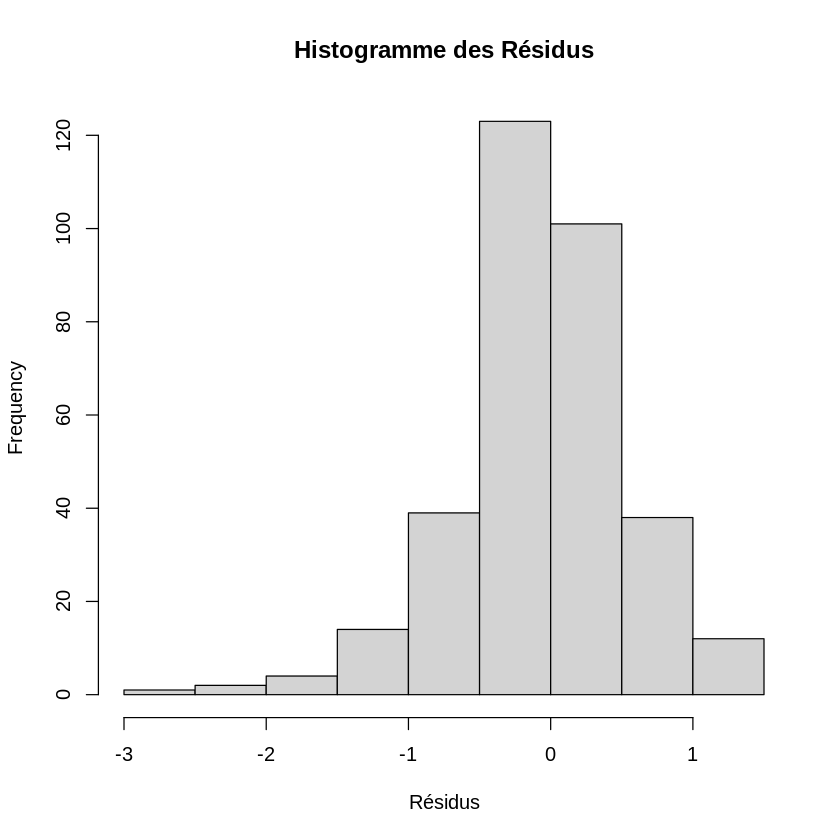

In [34]:
residuals <- test_data$rating - predictions
hist(residuals, main = "Histogramme des Résidus", xlab = "Résidus")
